In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control

## PT2 system with PI controller, pole cancellation

The process is:

$$ P(s) = \frac{k}{(1 + T_1 s)(1 + T_2 s)}$$

the controller is:

$$ C(s) = K_p \left(1 + \frac{1}{T_i s} \right) = \frac{Kp(1+T_i s)}{T_i s}$$

In [26]:
# definition of the parameters and frequency responses
k = 2
T1 = 1
T2 = 10

Kp = 1
Ti = 1

# coefficients of polynomials
numP = k/T1/T2
p = np.poly1d([-1/T1, -1/T2],r=True)
denP = p.coeffs

# alternatively
# numP = k
# denP = np.array([T1*T2, T1+T2 ,1])

numC = [Ti*Kp, Kp]
denC = [Ti, 0]

# the basic systems
P = control.tf(numP, denP)
C = control.tf(numC, denC)

In [22]:
# the open loop
G0 = control.series(P, C)
G0

TransferFunction(array([0.02, 0.2 ]), array([0.1 , 0.11, 0.01, 0.  ]))

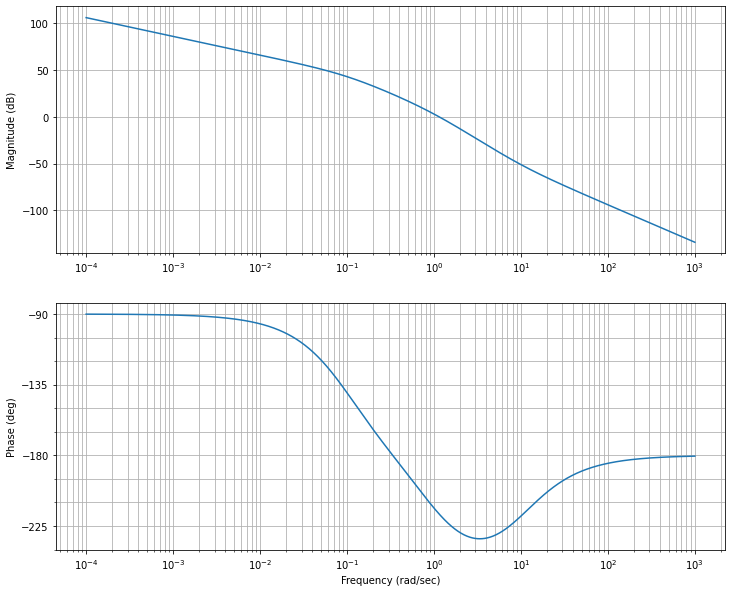

In [23]:
# freq response
om = np.logspace(-4,3,1000)
plt.figure(figsize=(12,10))
mag, phase, omega = control.bode_plot(G0, om, dB=True)

TypeError: cannot unpack non-iterable int object

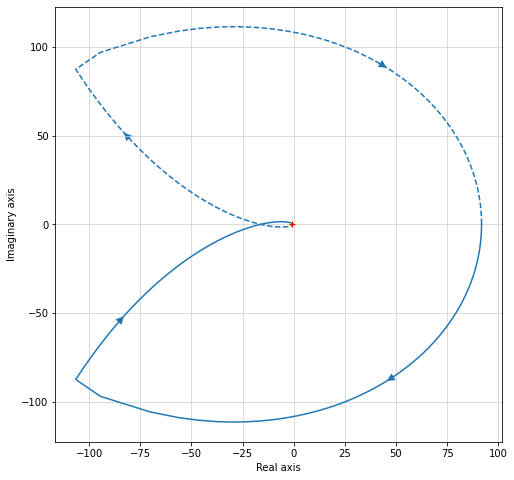

In [24]:
plt.figure(figsize=(8,8))
reG, imG, omega = control.nyquist_plot(G0, om)
plt.ylim([-5,5]);

In [ ]:
# closed loop for time domain simulation
G = control.feedback(G0)
G

In [ ]:
dG = np.poly1d(G.den[0][0])
dG.roots

In [ ]:
time = np.linspace(0,140,1000)
t, vt = control.step_response(G, time)

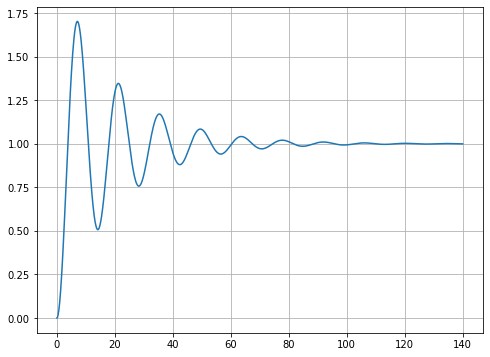

In [25]:
plt.figure(figsize=(8,6))
plt.plot(t, vt), plt.grid(True);